In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D,
    MaxPooling2D,
    AveragePooling2D,
    Flatten,
    Dense,
    Dropout,
)
import pickle 
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from tensorflow.keras.utils import to_categorical


In [2]:
input_dim_ = 64

In [3]:
# Emotion.py
num_classes = 2

model = Sequential()

# 1st convolution layer
model.add(Conv2D(64, (5, 5), activation="relu", input_shape=(input_dim_, input_dim_, 1)))
# model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(5, 5), strides=(2, 2)))

# 2nd convolution layer
# model.add(Conv2D(64, (3, 3), activation="relu"))
# model.add(Conv2D(64, (3, 3), activation="relu"))
# model.add(AveragePooling2D(pool_size=(3, 3), strides=(2, 2)))

# 3rd convolution layer
model.add(Conv2D(128, (3, 3), activation="relu"))
# model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(AveragePooling2D(pool_size=(3, 3), strides=(2, 2)))

model.add(Flatten())

model.add(Dense(num_classes, activation="softmax"))

Metal device set to: Apple M2


2024-06-29 15:36:04.174152: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-29 15:36:04.174878: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
model.load_weights("../models/crop_confusion_weights.h5")

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 128)       73856     
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 128)      0         
 ooling2D)                                                       
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 2)                 3

In [7]:
# load pickle file
files = ['../data_features_labels/Train_crop.pkl', '../data_features_labels/Test_crop.pkl', '../data_features_labels/Validation_crop.pkl', 
         '../data_features_labels/Eastern_Asian_Dataset.pkl', '../data_features_labels/Polish_Dataset.pkl', '../data_features_labels/Eastern_Asian2_Dataset.pkl']
x_train_list = []
y_train_list = [] 
for file in files:
    with open(file, 'rb') as f:
        features, labels = pickle.load(f)
    
    for pic, label in zip(features, labels):
        # plt.imshow(img_gray, cmap='binary_r')
        x_train_list.append(pic)
        y_train_list.append(label)

In [8]:
X_train = np.array(x_train_list).reshape(-1, input_dim_, input_dim_, 1)
#one-hot encode target column
Y_train = to_categorical(np.array(y_train_list))

In [9]:
X_train[0].shape, X_train[:10].shape

((64, 64, 1), (10, 64, 64, 1))

In [10]:
X_train[0]

array([[[ 47],
        [ 52],
        [ 47],
        ...,
        [ 66],
        [ 72],
        [ 76]],

       [[ 44],
        [ 47],
        [ 45],
        ...,
        [ 48],
        [ 47],
        [ 39]],

       [[ 42],
        [ 38],
        [ 39],
        ...,
        [ 50],
        [ 44],
        [ 39]],

       ...,

       [[126],
        [101],
        [ 93],
        ...,
        [214],
        [224],
        [225]],

       [[152],
        [140],
        [102],
        ...,
        [221],
        [221],
        [212]],

       [[113],
        [157],
        [151],
        ...,
        [213],
        [218],
        [202]]], dtype=uint8)

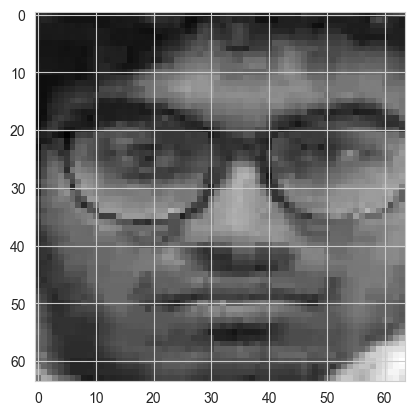

In [35]:
plt.imshow(X_train[0], cmap='binary_r')

In [11]:
model.predict(X_train[:10]).argmax(axis=1)

2024-06-29 15:36:56.488895: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-06-29 15:36:56.588580: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [12]:
label_names = ['Not Confused', 'Confused']

In [13]:
len(X_train)

26829

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
# x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.25, random_state=42)
x_train.shape, x_test.shape

((21463, 64, 64, 1), (5366, 64, 64, 1))

In [15]:
len(x_test), x_test[0].shape, np.expand_dims(x_test[0], axis=0).shape

(5366, (64, 64, 1), (1, 64, 64, 1))

In [16]:
model.predict(np.expand_dims(x_test[0], axis=0), verbose=0)[0, :]

array([0.845454  , 0.15454602], dtype=float32)

In [17]:
y_predict = model.predict(x_test).argmax(axis=1)
y_predict[:10]

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1])

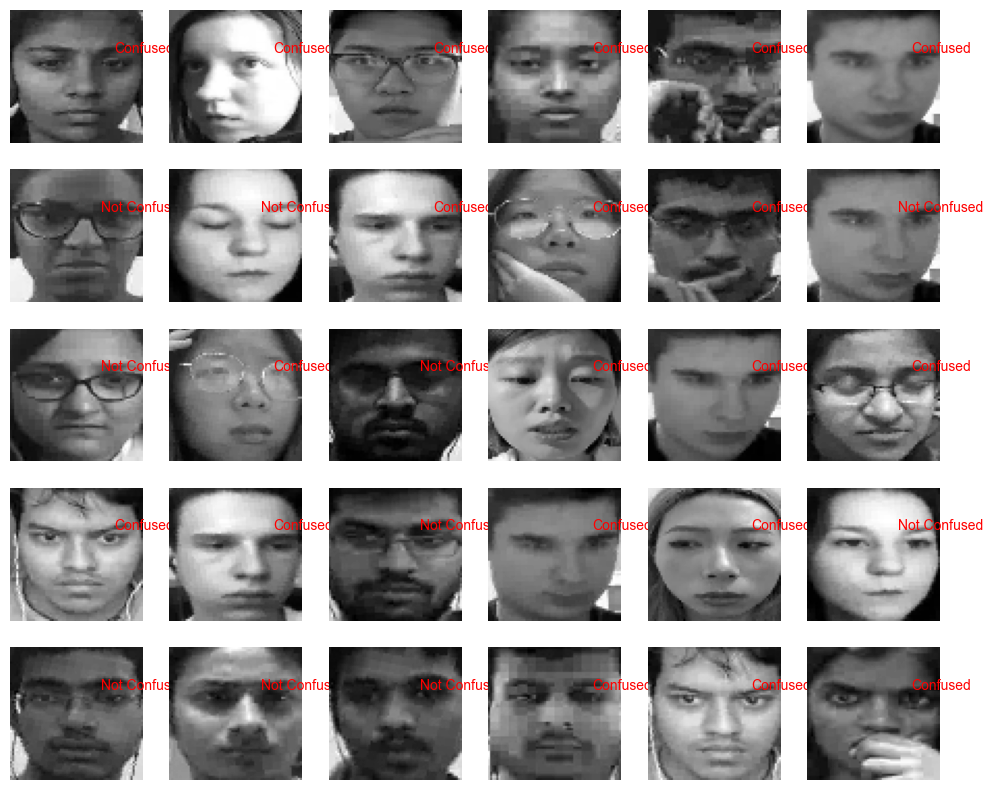

In [18]:
num_examples = 30

cols = 6
rows = np.ceil(num_examples / cols).astype(int)
np.random.seed(45)
choices = np.random.choice(np.arange(x_test.shape[0]), size=num_examples, 
                           replace=False)
count = 0
fig, ax = plt.subplots(rows, cols, figsize=(12, 10), sharex=True, sharey=True)

for row in range(rows):
    for col in range(cols):
        try:
        
            ax[row, col].imshow(x_test[choices[count]], cmap='binary_r')
            ax[row, col].text(64, 20, label_names[y_predict[choices[count]]], color='r',
                              horizontalalignment='center')
            ax[row, col].axis('off')
            count += 1
        except:
            pass
        
# fig.savefig('example_prediction.png', bbox_inches = 'tight', dpi = 300 )

In [19]:
# find the indices of the corresponding confusion score
idx_2 = np.where(y_predict==2)[0]
idx_1 = np.where(y_predict==1)[0]
idx_0 = np.where(y_predict==0)[0]
indices = [np.where(y_predict==i)[0] for i in np.unique(y_predict)]
# for i in np.unique(y_predict):
#   indices.append(np.where(y_predict==i)[0])
[len(idx) for idx in indices]

[2507, 2859]

In [20]:
np.random.choice([0, 2, 8], size=1, replace=False)

array([8])

In [21]:
np.unique(y_predict, return_counts=True)

(array([0, 1]), array([2507, 2859]))

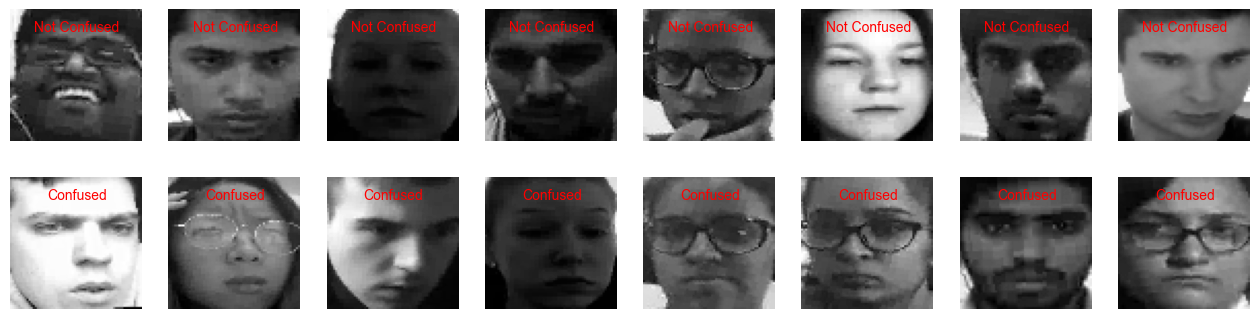

In [27]:
num_examples = 18

cols = 8
rows = 2

# choices = np.random.choice(idx_2, size=num_examples, 
#                            replace=False)

fig, ax = plt.subplots(rows, cols, figsize=(16, 4), sharex=True, sharey=True)
# for each emotion (not confused, confused, very confused)
for row in range(rows):
    # indices[row]
    # grab 6 examples
    np.random.seed(2025)
    choices = np.random.choice(indices[row], size=cols, replace=False)
    count = 0
    # for each example, I plot + write text (text = not confused, confused, very confused)
    for col in range(cols):
        try:
        
            ax[row, col].imshow(x_test[choices[count]], cmap='binary_r')
            ax[row, col].text(32, 10, label_names[y_predict[choices[count]]], color='r',
                              horizontalalignment='center')
            ax[row, col].axis('off')
            count += 1
        except:
            pass
        
fig.savefig('../figure_panels/crop_example_prediction_all_1.png', bbox_inches = 'tight', dpi = 300 )